#Winning Trades
Experimenting with player data to predict good trades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier





In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/CUNY AI Notes/final_nongk_data.csv')

In [4]:
df_new = pd.read_csv('/content/drive/My Drive/CUNY AI Notes/nongk_data_2023.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.head()

,Unnamed: 0,Player,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,fee,transfer_period,Target
0,0,Oliver Abildgaard,Hellas Verona,26,96,6.6,0,3,2,66.7,0.46,0.30,0.00,0.00,14.0,0.0,0,0,0.1,0.1,0.05,-0.1,-0.1,Serie A,10.0,6,6.0,3.0,1.0,7.0,16.0,43.8,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,Midfielder,59.0,1943.0,930.0,68.2,57.7,48.1,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-9,-1.37,-0.76,4.9,9.3,-4.4,-0.67,-0.36,oliver-abildgaard96,Denmark,Defensive Midfield,left,192.0,5000000,0.0,Winter,-14.784
1,1,Jayden Braaf,Hellas Verona,19,2,3.2,0,9,3,33.3,2.81,0.94,0.00,0.00,16.8,0.0,0,0,0.8,0.8,0.08,-0.8,-0.8,Serie A,5.0,3,2.0,3.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,2,7.0,1.0,0.0,Midfielder,76.9,849.0,192.0,93.2,76.5,66.7,0,0.1,0.1,2.0,5.0,0.0,0.0,5.0,0.33,2,4,-2,-0.62,0.12,2.7,5.0,-2.3,-0.72,-0.38,jayden-braaf02,Netherlands,Centre-Forward,right,180.0,1000000,0.0,Winter,-4.768
2,2,Juan David Cabal,Hellas Verona,21,1,4.9,0,1,1,100.0,0.20,0.20,0.00,0.00,32.6,0.0,0,0,0.0,0.0,0.02,0.0,0.0,Serie A,10.0,6,7.0,3.0,0.0,7.0,12.0,58.3,5.0,8.0,5.0,3.0,13,23.0,12.0,0.0,Defender,74.4,3165.0,1118.0,86.3,86.8,43.5,0,0.3,0.1,2.0,15.0,3.0,2.0,17.0,0.42,3,11,-8,-1.62,-1.02,4.7,9.0,-4.3,-0.88,-0.58,juan-david-cabal01,Colombia,Centre-Back,left,186.0,2500000,4000000.0,Summer,-7.791
3,3,Fabio Depaoli,Hellas Verona,25,97,24.1,2,19,4,21.1,0.79,0.17,0.11,0.50,16.0,0.0,0,0,1.7,1.7,0.09,0.3,0.3,Serie A,48.0,28,25.0,16.0,7.0,25.0,44.0,56.8,19.0,32.0,6.0,26.0,18,66.0,33.0,3.0,Defender,64.2,8131.0,4636.0,77.1,69.3,44.0,2,1.2,1.3,16.0,40.0,22.0,13.0,66.0,0.91,20,39,-19,-0.79,-0.14,21.9,33.0,-11.1,-0.46,-0.24,fabio-depaoli97,Italy,Right-Back,right,182.0,3000000,0.0,Summer,-18.316
4,4,Josh Doig,Hellas Verona,20,2,15.0,2,18,6,33.3,1.20,0.40,0.11,0.33,16.1,0.0,0,0,1.8,1.8,0.10,0.2,0.2,Serie A,19.0,8,6.0,7.0,6.0,6.0,16.0,37.5,10.0,25.0,6.0,19.0,11,30.0,13.0,1.0,Defender,67.4,6111.0,2875.0,82.3,68.1,45.7,3,1.2,1.3,12.0,28.0,12.0,8.0,27.0,0.86,13,22,-9,-0.60,0.23,13.4,15.7,-2.2,-0.15,0.37,josh-doig02,Scotland,Left-Back,left,189.0,10000000,3600000.0,Summer,-8.550


In [7]:
df_new.head()

,Unnamed: 0,Player,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,contract_expiration_date,market_value_in_eur
0,0,James Abankwah,Udinese,18,4,0.7,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Serie A,1.0,1,0.0,1.0,0.0,0.0,0.0,NaN,0.0,4.0,2.0,2.0,0,1.0,5.0,0.0,Defender,79.3,375.0,79.0,93.3,75.0,40.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0.00,0.03,0.4,0.7,-0.3,-0.37,-0.25,james-abankwah04,Ireland,Centre-Back,right,182.0,6/30/26 0:00,200000
1,1,Oliver Abildgaard,Hellas Verona,26,96,6.6,0,3,2,66.7,0.46,0.30,0.00,0.00,14.0,0.0,0,0,0.1,0.1,0.05,-0.1,-0.1,Serie A,10.0,6,6.0,3.0,1.0,7.0,16.0,43.8,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,Midfielder,59.0,1943.0,930.0,68.2,57.7,48.1,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-9,-1.37,-0.76,4.9,9.3,-4.4,-0.67,-0.36,oliver-abildgaard96,Denmark,Defensive Midfield,left,192.0,6/30/23 0:00,5000000
2,2,Tammy Abraham,Roma,24,97,24.3,8,62,28,45.2,2.55,1.15,0.13,0.29,12.0,0.0,0,0,10.8,10.8,0.17,-2.8,-2.8,Serie A,17.0,10,4.0,8.0,5.0,3.0,16.0,18.8,13.0,10.0,4.0,6.0,3,20.0,14.0,0.0,Forward,66.7,4964.0,1248.0,76.2,62.6,66.7,3,3.6,2.8,33.0,18.0,17.0,2.0,54.0,1.66,32,25,7,0.29,-0.08,37.7,22.9,14.8,0.61,-0.16,tammy-abraham97,England,Centre-Forward,right,194.0,6/30/26 0:00,45000000
3,3,Christian Acella,Cremonese,20,2,0.2,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Serie A,1.0,0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,Midfielder,100.0,129.0,4.0,100.0,100.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,-1,-6.00,-5.15,0.0,0.1,-0.1,-0.65,0.07,christian-acella02,Italy,Central Midfield,right,NaN,NaN,150000
4,4,Francesco Acerbi,Inter,34,88,26.9,0,18,2,11.1,0.67,0.07,0.00,0.00,15.9,0.0,0,0,1.0,1.0,0.06,-1.0,-1.0,Serie A,33.0,19,22.0,7.0,4.0,20.0,27.0,74.1,7.0,25.0,18.0,7.0,41,74.0,85.0,2.0,Defender,88.5,27034.0,8090.0,91.8,91.9,73.8,2,1.1,1.2,16.0,86.0,14.0,3.0,100.0,1.94,53,30,23,0.85,0.31,49.5,26.6,22.9,0.85,0.07,francesco-acerbi88,Italy,Centre-Back,left,192.0,6/30/23 0:00,4000000


In [8]:
df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1340 non-null   int64  
 1   Player               1340 non-null   object 
 2   Squad                1340 non-null   object 
 3   Age                  1340 non-null   int64  
 4   Born                 1340 non-null   int64  
 5   90s                  1340 non-null   float64
 6   Gls                  1340 non-null   int64  
 7   Sh                   1340 non-null   int64  
 8   SoT                  1340 non-null   int64  
 9   SoT%                 1240 non-null   float64
 10  Sh/90                1340 non-null   float64
 11  SoT/90               1340 non-null   float64
 12  G/Sh                 1240 non-null   float64
 13  G/SoT                1063 non-null   float64
 14  Dist                 1152 non-null   float64
 15  FK                   1248 non-null   f

In [9]:
new_nan_counts = df_new.isna().sum()
print(new_nan_counts)
# Calculate mean of numeric columns only
new_numeric_means = df_new.select_dtypes(include=[np.number]).mean()

# Fill NaNs in numeric columns only
df_new.fillna(new_numeric_means, inplace=True)

df_new = df_new.drop(columns = ['+/-', '+/-90', 'Unnamed: 0', 'Player', 'contract_expiration_date'])

new_label_encoder = LabelEncoder()

# Encoding each categorical column in the DataFrame
for column in df_new.select_dtypes(include=['object']).columns:
    df_new[column] = new_label_encoder.fit_transform(df_new[column])

Unnamed: 0                    0
Player                        0
Squad                         0
Age                           0
Born                          0
90s                           0
Gls                           0
Sh                            0
SoT                           0
SoT%                        251
Sh/90                         0
SoT/90                        0
G/Sh                        251
G/SoT                       747
Dist                        828
FK                          606
PK                            0
PKatt                         0
xG                          606
npxG                        606
npxG/Sh                     828
G-xG                        606
np:G-xG                     606
Based                         0
Tkl                         606
TklW                          0
Def 3rd                     606
Mid 3rd                     606
Att 3rd                     606
drTkl                       606
Att                         606
Tkl%    

In [10]:
# Assuming 'df' is your DataFrame with the 'Target' column
target_dict = df['Target'].to_dict()

# Sort the dictionary by values (Target values)
sorted_target_dict = dict(sorted(target_dict.items(), key=lambda item: item[0]))

# Print the sorted dictionary (optional)
display(sorted_target_dict)


{0: -14.784,
 1: -4.768,
 2: -7.791000000000001,
 3: -18.316000000000003,
 4: -8.549999999999999,
 5: -17.227999999999998,
 6: -13.284,
 7: -17.214,
 8: -17.11,
 9: -5.15,
 10: -14.399999999999997,
 11: -9.52,
 12: -8.217,
 13: -3.731,
 14: -0.8970000000000001,
 15: -21.736,
 16: 17.216,
 17: -4.95,
 18: 0.825,
 19: -0.18,
 20: -3.180000000000001,
 21: 3.863999999999997,
 22: 12.817999999999998,
 23: 0.936,
 24: 1.0260000000000038,
 25: 20.817000000000004,
 26: 17.71,
 27: -0.738000000000001,
 28: 12.648,
 29: 12.926,
 30: 2.472,
 31: 1.2480000000000002,
 32: -3.5720000000000005,
 33: 8.190000000000001,
 34: -9.009,
 35: -32.2,
 36: -27.195,
 37: -23.87100000000001,
 38: -30.624,
 39: -20.16,
 40: -11.455000000000002,
 41: -28.764,
 42: -58.912000000000006,
 43: -31.751999999999995,
 44: -57.684,
 45: -17.472,
 46: -23.517,
 47: -33.36600000000001,
 48: -18.96,
 49: -12.892,
 50: -21.868,
 51: -8.618,
 52: -3.27,
 53: -15.054,
 54: -11.988,
 55: -1.096,
 56: -7.700000000000001,
 57: -1

#Data Prep

In [11]:
nan_counts = df.isna().sum()
print(nan_counts)

Unnamed: 0               0
Player                   0
Squad                    0
Age                      0
Born                     0
90s                      0
Gls                      0
Sh                       0
SoT                      0
SoT%                   100
Sh/90                    0
SoT/90                   0
G/Sh                   100
G/SoT                  277
Dist                   188
FK                      92
PK                       0
PKatt                    0
xG                      92
npxG                    92
npxG/Sh                188
G-xG                    92
np:G-xG                 92
Based                    0
Tkl                     92
TklW                     0
Def 3rd                 92
Mid 3rd                 92
Att 3rd                 92
drTkl                   92
Att                     92
Tkl%                   165
Lost                    92
Blocks                  92
Blocks Sh               92
Blocks Pass             92
Int                      0
T

#Scale Target

In [12]:
# Define a MinMaxScaler for scaling 'Target' values
scaler = MinMaxScaler()

# Define conditions for scaling based on 'Position'
condition_forward = df['Position'] == 'Forward'
condition_midfielder = df['Position'] == 'Midfielder'
condition_defender = df['Position'] == 'Defender'

# Apply scaling based on each condition
df.loc[condition_forward, 'Target'] = scaler.fit_transform(df.loc[condition_forward, ['Target']])
df.loc[condition_midfielder, 'Target'] = scaler.fit_transform(df.loc[condition_midfielder, ['Target']])
df.loc[condition_defender, 'Target'] = scaler.fit_transform(df.loc[condition_defender, ['Target']])

In [13]:
# Calculate mean of numeric columns only
numeric_means = df.select_dtypes(include=[np.number]).mean()

# Fill NaNs in numeric columns only
df.fillna(numeric_means, inplace=True)

###Drop Variables/Encode Objects/Bin and Weight Target

In [14]:
df = df.drop(columns = ['+/-', '+/-90', 'Unnamed: 0', 'Player', 'fee', 'transfer_period'])

In [15]:
label_encoder = LabelEncoder()

# Encoding each categorical column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [16]:
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Split the data into training and testing sets (e.g., 70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.004274894017582031


In [17]:
num_bins = 4  # Specify the number of bins you want

# Create binned target
df['Binned_Target'] = pd.cut(df['Target'], bins=num_bins, labels=False)

In [18]:
weights_dict = {0: 1, 1:2, 2:3, 3:20}

# Create weighted_bin_target based on the specified weights
df['weighted_bin_target'] = df['Binned_Target'].map(weights_dict)


In [19]:
df.head()

,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,Target,Binned_Target,weighted_bin_target
0,63,26,96,6.6,0,3,2,66.7,0.46,0.30,0.00,0.00,14.0,0.0,0,0,0.1,0.1,0.05,-0.1,-0.1,9,10.0,6,6.0,3.0,1.0,7.0,16.0,43.800000,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,2,59.0,1943.0,930.0,68.2,57.7,48.1,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-0.76,4.9,9.3,-4.4,-0.67,-0.36,978,25,4,1,192.0,5000000,0.494798,1,2
1,63,19,2,3.2,0,9,3,33.3,2.81,0.94,0.00,0.00,16.8,0.0,0,0,0.8,0.8,0.08,-0.8,-0.8,9,5.0,3,2.0,3.0,0.0,0.0,0.0,45.634383,0.0,1.0,0.0,1.0,2,7.0,1.0,0.0,2,76.9,849.0,192.0,93.2,76.5,66.7,0,0.1,0.1,2.0,5.0,0.0,0.0,5.0,0.33,2,4,0.12,2.7,5.0,-2.3,-0.72,-0.38,529,63,3,2,180.0,1000000,0.563447,2,3
2,63,21,1,4.9,0,1,1,100.0,0.20,0.20,0.00,0.00,32.6,0.0,0,0,0.0,0.0,0.02,0.0,0.0,9,10.0,6,7.0,3.0,0.0,7.0,12.0,58.300000,5.0,8.0,5.0,3.0,13,23.0,12.0,0.0,0,74.4,3165.0,1118.0,86.3,86.8,43.5,0,0.3,0.1,2.0,15.0,3.0,2.0,17.0,0.42,3,11,-1.02,4.7,9.0,-4.3,-0.88,-0.58,618,17,2,1,186.0,2500000,0.445742,1,2
3,63,25,97,24.1,2,19,4,21.1,0.79,0.17,0.11,0.50,16.0,0.0,0,0,1.7,1.7,0.09,0.3,0.3,9,48.0,28,25.0,16.0,7.0,25.0,44.0,56.800000,19.0,32.0,6.0,26.0,18,66.0,33.0,3.0,0,64.2,8131.0,4636.0,77.1,69.3,44.0,2,1.2,1.3,16.0,40.0,22.0,13.0,66.0,0.91,20,39,-0.14,21.9,33.0,-11.1,-0.46,-0.24,349,48,10,2,182.0,3000000,0.364913,1,2
4,63,20,2,15.0,2,18,6,33.3,1.20,0.40,0.11,0.33,16.1,0.0,0,0,1.8,1.8,0.10,0.2,0.2,9,19.0,8,6.0,7.0,6.0,6.0,16.0,37.500000,10.0,25.0,6.0,19.0,11,30.0,13.0,1.0,0,67.4,6111.0,2875.0,82.3,68.1,45.7,3,1.2,1.3,12.0,28.0,12.0,8.0,27.0,0.86,13,22,0.23,13.4,15.7,-2.2,-0.15,0.37,609,74,7,1,189.0,10000000,0.439913,1,2


#Train the Model

In [20]:
from sklearn.model_selection import train_test_split

# Assume 'Target' is the name of the target variable
X = df.drop(['Target', 'Binned_Target', 'weighted_bin_target'], axis=1)  # Features
y = df['weighted_bin_target']  # Target variable

# Split the data into a 70-30 train-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Gradient Boosted Decision Tree Classifier / Naive Bayes / KNN / Random Forest / Neural Net / XGBoost

In [21]:
classifier_gb = GradientBoostingClassifier()


In [22]:
classifier_gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [23]:
# Make predictions on the test data using the trained Gradient Boosting model
y_pred_gb = classifier_gb.predict(X_test)

# Calculate accuracy on the test data
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Print the predictions
print("Predictions:", y_pred_gb)


Gradient Boosting Accuracy: 0.8395522388059702
Predictions: [ 3  3  2  2  2  2  2  3  2  3  2  2  2  2 20  2  2  2  3  3  2  2  3  2
  2  2  2  2  2  3  2  1  3  2 20  3  2  2  2  2  3  2  3  2  3  3  2  2
  2  2  2  2  2  2  3  1  3  3  3  3  3  2  2  3  3  2  2  3  3  3  2  2
  3  2  3 20 20  2 20  2  3  3 20  2  2  3  3  3  3  3  1  2  2  2  2  3
  2  2  3  3  2  2  2  3  2  3  3  2  2  2  2  3  2  3  2  3  2  3  1  3
  3  2  2  3 20  2  3  2  2  3  2  3  3  2  3  3  3  2  2  3  3  3  3  2
  3  2 20  3  2  3 20  3 20  2  2  2 20  2  3  2  2  3  2  3  2  3  2  3
  2  3  2  2  2  2  3  2  2  2  2  2  2  2  3  3  3  2  2  2  2  3  3  3
  1  3  2  2  2  2  2  2  2  2  3  2  2  3  2  3 20  3  1  3  3  3  2  2
  3 20  2  3  2  3  3  2  2  3  3  2  3  3  2  2  2  2  3  2  3  3  2  2
  1  3  3  3  2  3  3  2  3  3  3  2  3  3 20  3  3  3  2  3  2  2  3  3
  3  3  3  3]


In [24]:
y_pred_gb = classifier_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.8395522388059702


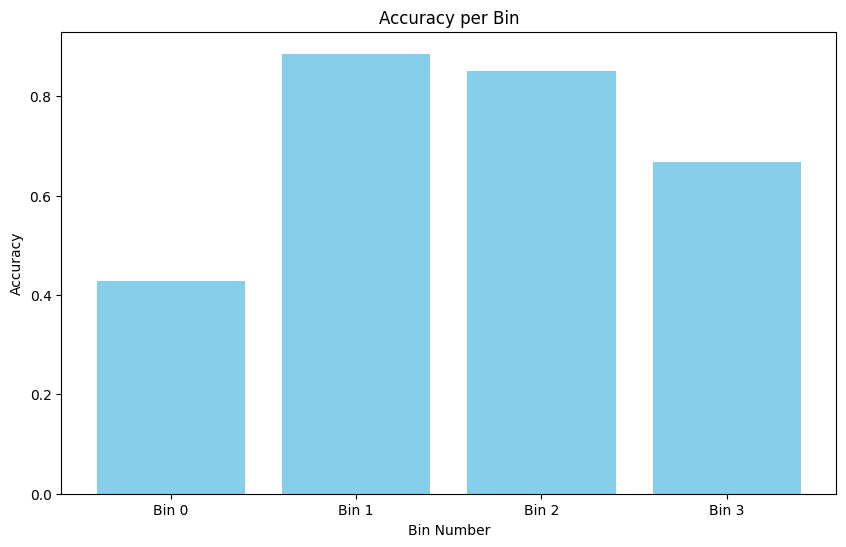

In [25]:
cm = confusion_matrix(y_test, y_pred_gb)
bin_accuracies = np.diag(cm) / np.sum(cm, axis=1)
# Visualize accuracies per bin
plt.figure(figsize=(10, 6))
plt.bar(range(len(bin_accuracies)), bin_accuracies, color='skyblue')
plt.xlabel('Bin Number')
plt.ylabel('Accuracy')
plt.title('Accuracy per Bin')
plt.xticks(ticks=range(len(bin_accuracies)), labels=[f'Bin {i}' for i in range(len(bin_accuracies))])
plt.show()

In [26]:

classifier_nb = GaussianNB()

# Fit the model
classifier_nb.fit(X_train, y_train)

# Evaluate the model
y_pred_nb = classifier_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.4962686567164179


In [27]:
classifier_knn = KNeighborsClassifier()

# Fit the model
classifier_knn.fit(X_train, y_train)

# Evaluate the model
y_pred_knn = classifier_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

K-Nearest Neighbors Accuracy: 0.4626865671641791


In [28]:
# Initialize Random Forest classifier
classifier_rf = RandomForestClassifier()

# Fit the model
classifier_rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = classifier_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8134328358208955


In [29]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [30]:

# Setup the parameters and datasets for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 21,
    'max_depth': 4,
    'learning_rate': 0.2,
    'n_estimators': 200}
epochs = 40

In [31]:
# Initialize the XGBoost classifier
xgb_classifier_model = xgb.train(params, train, epochs)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
predictions = xgb_classifier_model.predict(test)

In [33]:
print(predictions)

[ 3.  3.  2.  2.  2.  2.  2.  3.  2.  3.  2.  2.  2.  2.  3.  2.  2.  2.
  3.  2.  2.  2.  3.  2.  2.  2.  2.  2.  2.  3.  2.  2.  3.  2. 20.  3.
  2.  3.  2.  2.  3.  2.  3.  2.  3.  2.  2.  2.  2.  2.  2.  2.  1.  2.
  3.  2.  3.  3.  3.  3.  3.  2.  2.  3.  3.  2.  2.  3.  3.  3.  1.  2.
  3.  2.  3. 20. 20.  2.  3.  2.  3.  3. 20.  2.  2.  3.  3.  3.  3.  3.
  2.  3.  2.  2.  2.  3.  2.  2.  3.  3.  3.  2.  2.  3.  2.  3.  3.  2.
  2.  2.  2.  3.  2.  3.  2.  3.  2.  3.  1.  3.  3.  2.  1.  3. 20.  2.
  3.  2.  2.  3.  2.  3.  3.  2.  3.  3.  2.  2.  2.  3.  3.  3.  3.  2.
  3.  2.  3.  3.  2.  3. 20.  3. 20.  2.  3.  2. 20.  2.  3.  2.  2.  3.
  2.  3.  2.  3.  2.  3.  2.  3.  2.  2.  2.  2.  3.  2.  2.  2.  2.  2.
  2.  2.  3.  2.  3.  2.  2.  2.  2.  3.  3.  3.  1.  3.  2.  2.  2.  2.
  2.  2.  3.  2.  3.  2.  2.  3.  2.  3.  3.  3.  1.  3.  3.  3.  2.  2.
  3.  3.  2.  3.  3.  3.  3.  2.  2.  3.  3.  2. 20.  3.  2.  1.  2.  2.
  3.  2.  3.  3.  2.  2.  1.  3.  3.  3.  2.  2.  3

In [34]:
accuracy_score(y_test, predictions)

0.8134328358208955

In [35]:

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

In [36]:

# Calculate accuracy per bin
bin_accuracies = np.diag(cm) / np.sum(cm, axis=1)


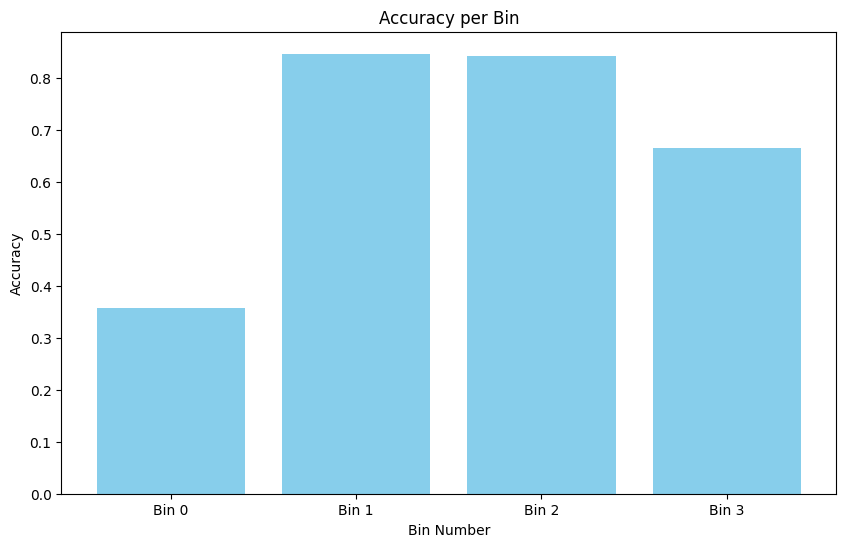

In [37]:

# Visualize accuracies per bin
plt.figure(figsize=(10, 6))
plt.bar(range(len(bin_accuracies)), bin_accuracies, color='skyblue')
plt.xlabel('Bin Number')
plt.ylabel('Accuracy')
plt.title('Accuracy per Bin')
plt.xticks(ticks=range(len(bin_accuracies)), labels=[f'Bin {i}' for i in range(len(bin_accuracies))])
plt.show()

In [38]:
# Extract feature importances
importance_dict = xgb_classifier_model.get_score(importance_type='weight')


In [39]:

# Create a DataFrame from the dictionary
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
})

# Sort the DataFrame by importance in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Reset the index for better readability
importance_df.reset_index(drop=True, inplace=True)


In [40]:
# Display the DataFrame
print(importance_df)


                Feature  Importance
0                   PPM       117.0
1              Position        91.0
2                  onGA        82.0
3                On-Off        79.0
4                   onG        78.0
5                 xG+/-        55.0
6                 Squad        54.0
7                  SoT%        41.0
8            Short Cmp%        41.0
9             xG_On-Off        40.0
10                Based        39.0
11                  90s        37.0
12          player_code        36.0
13            Long Cmp%        36.0
14          Medium Cmp%        34.0
15           Total Cmp%        33.0
16                  1/3        32.0
17                 Dist        31.0
18  market_value_in_eur        30.0
19                Sh/90        27.0
20                onxGA        24.0
21     country_of_birth        23.0
22                  Att        21.0
23                G/SoT        20.0
24              np:G-xG        19.0
25              xG+/-90        19.0
26              Att 3rd     

In [41]:
# Define the number of bins
num_bins = 4

# Loop through each bin
for i in range(num_bins):
    # Select data for the current bin
    bin_data = df[df['Binned_Target'] == i]

    # Extract features and target variables
    X = bin_data.drop(['Target', 'Binned_Target', 'weighted_bin_target'], axis=1)
    y = bin_data['Target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost regressor model
    xgb_regressor_model = xgb.XGBRegressor()
    xgb_regressor_model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = xgb_regressor_model.predict(X_test)

    # Evaluate the model's performance using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Print the bin number and MSE
    print(f"Bin {i + 1} MSE: {mse}")


Bin 1 MSE: 0.0035335772488550997
Bin 2 MSE: 0.0021485646232395376
Bin 3 MSE: 0.0012844405002375595
Bin 4 MSE: 0.008452950791426399


In [50]:

# Step 1: Convert df_new to DMatrix
dm_new = xgb.DMatrix(df_new)

# Step 2: Run XGBoost classifier model on new data
predicted_bins = xgb_classifier_model.predict(dm_new)

# Step 3: Convert predicted bins to DataFrame
predicted_bins_df = pd.DataFrame(predicted_bins, columns=['predicted_bins'])

# Step 4: Add predicted bins column to original DataFrame
df_new_with_bins = pd.concat([df_new, predicted_bins_df], axis=1)

# Step 5: Display DataFrame with predicted bins
df_new_with_bins.head()


,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,predicted_bins
0,159,18,4,0.7,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,1,0.0,1.0,0.0,0.0,0.0,47.081152,0.0,4.0,2.0,2.0,0,1.0,5.0,0.0,0,79.3,375.0,79.0,93.3,75.0,40.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0.03,0.4,0.7,-0.3,-0.37,-0.25,1579,52,2,2,182.000000,200000,2.0
1,72,26,96,6.6,0,3,2,66.700000,0.46,0.30,0.000000,0.000000,14.000000,0.0,0,0,0.1,0.1,0.050000,-0.1,-0.1,9,10.0,6,6.0,3.0,1.0,7.0,16.0,43.800000,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,2,59.0,1943.0,930.0,68.2,57.7,48.100000,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-0.76,4.9,9.3,-4.4,-0.67,-0.36,2880,28,4,1,192.000000,5000000,2.0
2,132,24,97,24.3,8,62,28,45.200000,2.55,1.15,0.130000,0.290000,12.000000,0.0,0,0,10.8,10.8,0.170000,-2.8,-2.8,9,17.0,10,4.0,8.0,5.0,3.0,16.0,18.800000,13.0,10.0,4.0,6.0,3,20.0,14.0,0.0,1,66.7,4964.0,1248.0,76.2,62.6,66.700000,3,3.6,2.8,33.0,18.0,17.0,2.0,54.0,1.66,32,25,-0.08,37.7,22.9,14.8,0.61,-0.16,3563,33,3,2,194.000000,45000000,2.0
3,40,20,2,0.2,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,0,1.0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2,100.0,129.0,4.0,100.0,100.0,56.403474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,-5.15,0.0,0.1,-0.1,-0.65,0.07,647,55,1,2,181.807811,150000,3.0
4,76,34,88,26.9,0,18,2,11.100000,0.67,0.07,0.000000,0.000000,15.900000,0.0,0,0,1.0,1.0,0.060000,-1.0,-1.0,9,33.0,19,22.0,7.0,4.0,20.0,27.0,74.100000,7.0,25.0,18.0,7.0,41,74.0,85.0,2.0,0,88.5,27034.0,8090.0,91.8,91.9,73.800000,2,1.1,1.2,16.0,86.0,14.0,3.0,100.0,1.94,53,30,0.31,49.5,26.6,22.9,0.85,0.07,1196,55,2,1,192.000000,4000000,3.0


In [53]:
df_new_with_bins["predicted_bins"].value_counts()

predicted_bins
2.0     1815
3.0     1745
20.0     217
1.0      173
Name: count, dtype: int64

In [60]:
# Initialize an empty DataFrame to store the results
df_bin_target = df_new_with_bins.copy()

# Initialize an empty list to store predicted target values
predicted_targets = []

# Iterate over unique bin values
for bin_value in np.unique(df_bin_target['predicted_bins']):
    # Subset data for the current bin
    subset_data = df_bin_target[df_bin_target['predicted_bins'] == bin_value]

    # Extract features for the current bin
    subset_features = subset_data.drop(['predicted_bins'], axis=1)

    # Use the corresponding trained XGBoost regressor model to predict the target variable
    predicted_target_subset = xgb_regressor_model.predict(subset_features.values)

    # Append predicted target values to the list
    predicted_targets.extend(predicted_target_subset)

# Add the predicted_target column to df_bin_target
df_bin_target['predicted_target'] = predicted_targets



   Squad  Age  Born   90s  Gls  Sh  SoT       SoT%  Sh/90  SoT/90      G/Sh  \
0    159   18     4   0.7    0   0    0  30.201676   0.00    0.00  0.083539   
1     72   26    96   6.6    0   3    2  66.700000   0.46    0.30  0.000000   
2    132   24    97  24.3    8  62   28  45.200000   2.55    1.15  0.130000   
3     40   20     2   0.2    0   0    0  30.201676   0.00    0.00  0.083539   
4     76   34    88  26.9    0  18    2  11.100000   0.67    0.07  0.000000   

      G/SoT       Dist   FK  PK  PKatt    xG  npxG   npxG/Sh  G-xG  np:G-xG  \
0  0.278149  17.547213  0.0   0      0   0.0   0.0  0.094462   0.0      0.0   
1  0.000000  14.000000  0.0   0      0   0.1   0.1  0.050000  -0.1     -0.1   
2  0.290000  12.000000  0.0   0      0  10.8  10.8  0.170000  -2.8     -2.8   
3  0.278149  17.547213  0.0   0      0   0.0   0.0  0.094462   0.0      0.0   
4  0.000000  15.900000  0.0   0      0   1.0   1.0  0.060000  -1.0     -1.0   

   Based   Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  d

In [61]:
df_bin_target.head()


,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,predicted_bins,predicted_target
0,159,18,4,0.7,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,1,0.0,1.0,0.0,0.0,0.0,47.081152,0.0,4.0,2.0,2.0,0,1.0,5.0,0.0,0,79.3,375.0,79.0,93.3,75.0,40.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0.03,0.4,0.7,-0.3,-0.37,-0.25,1579,52,2,2,182.000000,200000,2.0,0.952168
1,72,26,96,6.6,0,3,2,66.700000,0.46,0.30,0.000000,0.000000,14.000000,0.0,0,0,0.1,0.1,0.050000,-0.1,-0.1,9,10.0,6,6.0,3.0,1.0,7.0,16.0,43.800000,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,2,59.0,1943.0,930.0,68.2,57.7,48.100000,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-0.76,4.9,9.3,-4.4,-0.67,-0.36,2880,28,4,1,192.000000,5000000,2.0,0.755265
2,132,24,97,24.3,8,62,28,45.200000,2.55,1.15,0.130000,0.290000,12.000000,0.0,0,0,10.8,10.8,0.170000,-2.8,-2.8,9,17.0,10,4.0,8.0,5.0,3.0,16.0,18.800000,13.0,10.0,4.0,6.0,3,20.0,14.0,0.0,1,66.7,4964.0,1248.0,76.2,62.6,66.700000,3,3.6,2.8,33.0,18.0,17.0,2.0,54.0,1.66,32,25,-0.08,37.7,22.9,14.8,0.61,-0.16,3563,33,3,2,194.000000,45000000,2.0,0.789802
3,40,20,2,0.2,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,0,1.0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2,100.0,129.0,4.0,100.0,100.0,56.403474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,-5.15,0.0,0.1,-0.1,-0.65,0.07,647,55,1,2,181.807811,150000,3.0,0.763163
4,76,34,88,26.9,0,18,2,11.100000,0.67,0.07,0.000000,0.000000,15.900000,0.0,0,0,1.0,1.0,0.060000,-1.0,-1.0,9,33.0,19,22.0,7.0,4.0,20.0,27.0,74.100000,7.0,25.0,18.0,7.0,41,74.0,85.0,2.0,0,88.5,27034.0,8090.0,91.8,91.9,73.800000,2,1.1,1.2,16.0,86.0,14.0,3.0,100.0,1.94,53,30,0.31,49.5,26.6,22.9,0.85,0.07,1196,55,2,1,192.000000,4000000,3.0,0.763761


In [63]:
# Define a function to calculate score based on predicted_bin and predicted_target
def calculate_score(row):
    bin_value = row['predicted_bins']
    target_value = row['predicted_target']

    if bin_value == 1:
        return target_value + 1
    elif bin_value == 2:
        return target_value + 2
    elif bin_value == 3:
        return target_value + 3
    elif bin_value == 20:
        return target_value + 4
    else:
        return None  # Handle cases where bin_value is not 1, 2, 3, or 20

# Apply the function to create the "score" column
df_bin_target['score'] = df_bin_target.apply(calculate_score, axis=1)




In [64]:
# Display DataFrame df_bin_target with the new "score" column
df_bin_target.head()

,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Based,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,drTkl,Att,Tkl%,Lost,Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Position,Total Cmp%,TotDist,PrgDist,Short Cmp%,Medium Cmp%,Long Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,PPM,onG,onGA,On-Off,onxG,onxGA,xG+/-,xG+/-90,xG_On-Off,player_code,country_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,predicted_bins,predicted_target,score
0,159,18,4,0.7,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,1,0.0,1.0,0.0,0.0,0.0,47.081152,0.0,4.0,2.0,2.0,0,1.0,5.0,0.0,0,79.3,375.0,79.0,93.3,75.0,40.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0.03,0.4,0.7,-0.3,-0.37,-0.25,1579,52,2,2,182.000000,200000,2.0,0.952168,2.952168
1,72,26,96,6.6,0,3,2,66.700000,0.46,0.30,0.000000,0.000000,14.000000,0.0,0,0,0.1,0.1,0.050000,-0.1,-0.1,9,10.0,6,6.0,3.0,1.0,7.0,16.0,43.800000,9.0,7.0,1.0,6.0,5,15.0,17.0,0.0,2,59.0,1943.0,930.0,68.2,57.7,48.100000,0,0.4,0.3,6.0,17.0,3.0,2.0,15.0,1.08,2,11,-0.76,4.9,9.3,-4.4,-0.67,-0.36,2880,28,4,1,192.000000,5000000,2.0,0.755265,2.755265
2,132,24,97,24.3,8,62,28,45.200000,2.55,1.15,0.130000,0.290000,12.000000,0.0,0,0,10.8,10.8,0.170000,-2.8,-2.8,9,17.0,10,4.0,8.0,5.0,3.0,16.0,18.800000,13.0,10.0,4.0,6.0,3,20.0,14.0,0.0,1,66.7,4964.0,1248.0,76.2,62.6,66.700000,3,3.6,2.8,33.0,18.0,17.0,2.0,54.0,1.66,32,25,-0.08,37.7,22.9,14.8,0.61,-0.16,3563,33,3,2,194.000000,45000000,2.0,0.789802,2.789802
3,40,20,2,0.2,0,0,0,30.201676,0.00,0.00,0.083539,0.278149,17.547213,0.0,0,0,0.0,0.0,0.094462,0.0,0.0,9,1.0,0,1.0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2,100.0,129.0,4.0,100.0,100.0,56.403474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,-5.15,0.0,0.1,-0.1,-0.65,0.07,647,55,1,2,181.807811,150000,3.0,0.763163,3.763163
4,76,34,88,26.9,0,18,2,11.100000,0.67,0.07,0.000000,0.000000,15.900000,0.0,0,0,1.0,1.0,0.060000,-1.0,-1.0,9,33.0,19,22.0,7.0,4.0,20.0,27.0,74.100000,7.0,25.0,18.0,7.0,41,74.0,85.0,2.0,0,88.5,27034.0,8090.0,91.8,91.9,73.800000,2,1.1,1.2,16.0,86.0,14.0,3.0,100.0,1.94,53,30,0.31,49.5,26.6,22.9,0.85,0.07,1196,55,2,1,192.000000,4000000,3.0,0.763761,3.763761


In [66]:
# prompt: I'd like to write df_bin_target as a csv file to the directory, and call it new_player_scores.csv

df_bin_target.to_csv('/content/drive/My Drive/CUNY AI Notes/new_player_scores.csv')
